In [11]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import torch.tensor as tf
from torch.autograd import Variable
import pickle as pickle

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w=0.01
stepsize = 1e-2
e=0.01
fRecur=0.0
fRecur1=0.0
alpha=0.9
beta=0.999

In [12]:
def forward(x):
    return x * w

In [13]:
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)*(y_pred - y)

In [14]:
def gradient(x, y):
    return 2 * x * ((x * w) - y)

In [15]:
def backpropagation(x,y,index):
    fRecur=momen(x,y,index)
    fRecur1=velocity(x,y,index)
    return w- (e*fRecur/((math.sqrt(fRecur1)+stepsize)))

In [16]:
def adaGrad(x, y):
    if fRecur==0.0:
        return math.pow(gradient(x, y),2)
    else:
        return adaGrad(x, y) + math.pow(gradient(x, y),2)

In [17]:
def momen(x,y,index):
    if fRecur==0.0:
        return (1- alpha)*gradient(x, y)
    else:
        return ((alpha*momen(x,y) + (1- alpha)*gradient(x, y)))/(1-pow(alpha,index))

In [18]:
def velocity(x,y,index):
    if fRecur1==0.0:
        return (1- beta)*pow(gradient(x, y),2)
    else:
        return ((beta*velocity(x,y) + (1- beta)*pow(gradient(x, y),2)))/(1-pow(beta,index))

In [19]:
def RMSprop(x,y):
    if fRecur==0.0:
        return 0.1*(gradient(x,y)*gradient(x,y))
    else:
        return 0.9* RMSprop(x,y)+ 0.1*(gradient(x,y)*gradient(x,y))

In [20]:
arrLoss=[]
arrMSE=[]
l=[]
arrW=[]
arrE=[]
arrLoss=[]
print(forward(4))
for epoch in range(100):
    for index,(x_val, y_val) in enumerate(zip(x_data, y_data)):
#        print(momen(x_val,y_val,index))
        w=backpropagation(x_val,y_val,index)
#        print(w)
        #print("\tgrad: ", x_val, y_val, w)
        l = loss(x_val, y_val)
#    print("progress:", epoch, "w=", w, "loss=", l)
    arrLoss.append(l)
    arrW.append(w)

0.04


8.0


<function matplotlib.pyplot.show(*args, **kw)>

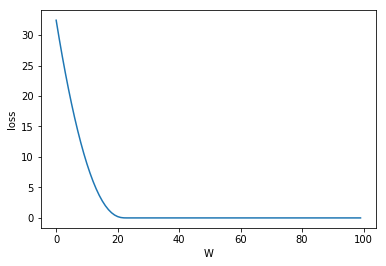

In [21]:
print(forward(4))
plt.plot(arrLoss)
plt.xlabel('W')
plt.ylabel('loss')
plt.show